In [24]:
from Bio import SeqIO

def read_sequences(input_file, debug):

    # fastq_file = "reads_for_analysis.fastq"  # Replace with your FASTQ file path
    fastq_file = input_file

    sequences = SeqIO.parse(fastq_file, "fastq")

    if debug:
        # Iterate through the sequences in the FASTQ file
        for record in sequences:
            # Access sequence data and quality scores
            sequence = str(record.seq)
            quality = record.letter_annotations["phred_quality"]

            # Do something with the sequence and quality data
            print(f"Header: {record.id}")
            print(f"Sequence: {sequence}")
            print(f"Quality: {quality}")

            # print(f"Sequence length: {len(sequence)}")
            # print(f"Quality length: {len(quality)}")
            # break

    return sequences

In [25]:
# ilumina 1.5
# ilumina 1.3
# solexa
# sanger
# ilumina 1.8

def detect_quality_encoding(quality_line):
    # Illumina 1.5+ Phred+64 encoding
    if all(67 <= ord(q) <= 104 for q in quality_line):
        return "Illumina 1.5+ Phred+64"
    # Illumina 1.3+ Phred+64 encoding
    elif all(64 <= ord(q) <= 104 for q in quality_line):
        return "Illumina 1.3+ Phred+64"
    # Solexa Solexa+64 encoding
    elif all(59 <= ord(q) <= 104 for q in quality_line):
        return "Solexa Solexa+64"
    # Sanger Phred+33 encoding
    elif all(33 <= ord(q) <= 73 for q in quality_line):
        return "Sanger Phred+33"
    # Illumina 1.8+ Phred+33 encoding
    elif all(33 <= ord(q) <= 74 for q in quality_line):
        return "Illumina 1.8+ Phred+33"
    else:
        return "Unknown"

# Example FASTQ quality line (replace with your actual quality line)
quality_line = "1>>1>AD1DF3@1BGGGGGGGGBGG3F3FGH3FG11B000AA00A/0/B1A1BF000DFFF22111B2FGHBB11BGHBGHB211FCCGHCBGBBC00B11FFFDBEE1BGG22@GHHBGB1FGFGH2GB1GBFG?EEEAFHHGHFGHGH"
quality_line = "ABBBBBBBBDAFFGGGGGGGGGGGGGHHFHHHHGGGGGHGGGGGHHGHHHGHGGHGHHGGGGC?EFHGGGGGHHGHCCFCDGGGGGAGHHGADCD.GGHHHEHGGGCGBHCC.;CCDFDBGGBGGGFAF?9FGEFFFFF/;FF/;DAB9B-"

encoding = detect_quality_encoding(quality_line)
print(f"Quality encoding: {encoding}")


Quality encoding: Sanger Phred+33


In [26]:
def detect_all_quality_encoding(quality_line):
    encodings = []

    # Illumina 1.5+ Phred+64 encoding
    if all(67 <= ord(q) <= 104 for q in quality_line):
        encodings.append("Illumina 1.5+ Phred+64")
    # Illumina 1.3+ Phred+64 encoding
    if all(64 <= ord(q) <= 104 for q in quality_line):
        encodings.append("Illumina 1.3+ Phred+64")
    # Solexa Solexa+64 encoding
    if all(59 <= ord(q) <= 104 for q in quality_line):
        encodings.append("Solexa Solexa+64")
    # Sanger Phred+33 encoding
    if all(33 <= ord(q) <= 73 for q in quality_line):
        encodings.append("Sanger Phred+33")
    # Illumina 1.8+ Phred+33 encoding
    if all(33 <= ord(q) <= 74 for q in quality_line):
        encodings.append("Illumina 1.8+ Phred+33")

    if not encodings:
        encodings.append("Unknown")

    return encodings

In [27]:
from Bio import SeqIO

fastq_file = "reads_for_analysis.fastq"  # Replace with your FASTQ file path

i= 0

# Iterate through the sequences in the FASTQ file
for record in SeqIO.parse(fastq_file, "fastq"):
    # Access sequence data and quality scores
    sequence = str(record.seq)
    quality = record.letter_annotations["phred_quality"]

    # Get the original quality line with ASCII symbols
    quality_line = "".join([chr(q + 33) for q in quality])

    # Do something with the quality line
    print(f"Header: {record.id}")
    print(f"Sequence: {sequence}")
    print(f"Quality Line: {quality_line}")
    i+=1
    if i == 2:
        break


Header: M00827:12:000000000-AEUNW:1:1101:12983:1610
Sequence: TGCGTTTATTACATTACCTTCTATTATATTTGCTGACGAACCAACAGGTGCACTGGATTCTAAAAGTACTCAAGATTTATTAAAACGATTAACAAGAATGAATGAAGCATTTAAGTCTACAATTATTATGGTAACGCATGATCCTGTTGC
Quality Line: 1>>1>AD1DF3@1BGGGGGGGGBGG3F3FGH3FG11B000AA00A/0/B1A1BF000DFFF22111B2FGHBB11BGHBGHB211FCCGHCBGBBC00B11FFFDBEE1BGG22@GHHBGB1FGFGH2GB1GBFG?EEEAFHHGHFGHGH
Header: M00827:12:000000000-AEUNW:1:1101:16324:1777
Sequence: AGGCGTTATCGTGGCGATGACGCTGGAAGAAGCGGAAGCGGCTGTTCACGATATGCTGGCGGGCAACGCTTTTGGCGACGCGGGTCATCGCATCGTTATCGAAGAGTTCCTCGATGGCGAAGAAGCGAGCTTTATCGTGATGGTGGACGGC
Quality Line: ABBBBBBBBDAFFGGGGGGGGGGGGGHHFHHHHGGGGGHGGGGGHHGHHHGHGGHGHHGGGGC?EFHGGGGGHHGHCCFCDGGGGGAGHHGADCD.GGHHHEHGGGCGBHCC.;CCDFDBGGBGGGFAF?9FGEFFFFF/;FF/;DAB9B-


In [43]:
def check_encodings(records, debug):
    """ iterates SeqRecords object to check each record's encoding
    
        input: fastq sequences
        output: dictionary of encodings """

    # Initialize an empty dictionary to store the counts
    unique_strings = {}

    encoding_counts = {
        "Illumina 1.5+ Phred+64": 0,
        "Illumina 1.3+ Phred+64": 0,
        "Solexa Solexa+64": 0,
        "Sanger Phred+33": 0,
        "Illumina 1.8+ Phred+33": 0,
        "Unknown": 0
    }

    # Iterate through the sequences in the FASTQ file
    for record in records:
        # Access sequence data and quality scores
        sequence = str(record.seq)
        quality = record.letter_annotations["phred_quality"]

        # Get the original quality line with ASCII symbols
        quality_line = "".join([chr(q + 33) for q in quality])

        if debug:
            # Do something with the quality line
            print(f"Header: {record.id}")
            # print(f"Sequence: {sequence}")
            print(f"Quality Line: {quality_line}")

        
            
        # encoding = detect_quality_encoding(quality_line) 
        encodings = detect_all_quality_encoding(quality_line)

        for encoding in encodings:
            encoding_counts[encoding] += 1

        # if debug:
        #     print(f"Encoding: {encoding}")

        # # Check if the string is in the dictionary, if not, add it
        # if encoding not in unique_strings:
        #     unique_strings[encoding] = 1
        # else:
        #     # If it's already in the dictionary, increment the count
        #     unique_strings[encoding] += 1
        

    # return unique_strings
    return encoding_counts

In [29]:
from Bio import SeqIO
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from collections import Counter
import numpy as np


def print_cg_ratio_hist(fastq_file):

    # Inicializuojame kintamuosius rezultatams
    total_reads = 0
    cg_ratios = []
    bin_count = 37

    # Nuskaitome FASTQ failą ir skaičiuojame C/G santykį kiekviename reade
    for record in SeqIO.parse(fastq_file, "fastq"):
        sequence = str(record.seq)
        c_count = sequence.count("C")
        g_count = sequence.count("G")
        cg_ratio = (c_count + g_count) / len(sequence) * 100
        cg_ratios.append(cg_ratio)
        total_reads += 1 

    # Sudarome histogramą
    plt.hist(cg_ratios, bins=bin_count, color='skyblue', edgecolor='black')
    plt.title('C/G Nucleotide Ratio in Reads')
    plt.xlabel('C/G Ratio (%)')
    plt.ylabel('Number of Reads')

    # Ieškome histogramos viršūnių
    peaks, props = find_peaks(np.histogram(cg_ratios, bins=bin_count)[0], height=500)

    print(f"my peaks:\n '{peaks}'")
    print(f"\n\nmy peaks properties:\n '{props}'")

    # Žymime viršūnes raudonai
    plt.plot(np.histogram(cg_ratios, bins=bin_count)[1][peaks], np.histogram(cg_ratios, bins=bin_count)[0][peaks], "ro")
    print(f"peak point print X: {np.histogram(cg_ratios, bins=bin_count)[1][peaks]}\n")
    print(f"peak point print Y: {np.histogram(cg_ratios, bins=bin_count)[0][peaks]}\n")

    # Išvedame rezultatus
    plt.show()

    # Išvedame bendrą informaciją
    print(f"Total Reads: {total_reads}")
    print(f"Average C/G Ratio: {sum(cg_ratios) / total_reads:.2f}%")
    print(f"Number of Peaks: {len(peaks)}")


In [30]:
from Bio import SeqIO
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from collections import Counter
import numpy as np


def analyze_cg_ratio_in_fastq(sequences):

    # Inicializuojame kintamuosius rezultatams
    total_reads = 0
    cg_ratios = []
    bin_count = 37

    # Nuskaitome FASTQ failą ir skaičiuojame C/G santykį kiekviename reade
    for record in sequences:
        sequence = str(record.seq)
        c_count = sequence.count("C")
        g_count = sequence.count("G")
        cg_ratio = (c_count + g_count) / len(sequence) * 100
        cg_ratios.append(cg_ratio)
        total_reads += 1

    peaks, _ = find_peaks(np.histogram(cg_ratios, bins=bin_count)[0], height=500)

    print(f"Total Reads: {total_reads}")
    print(f"Average C/G Ratio: {sum(cg_ratios) / total_reads:.2f}%")
    print(f"Number of Peaks: {len(peaks)}")

    X_Values_at_peaks = np.histogram(cg_ratios, bins=bin_count)[1][peaks]

    return X_Values_at_peaks


In [39]:
from Bio import SeqIO

def find_sequences_for_blast(fastq_file, percent_list):

    # List of C/G ratios you want to match
    ratios_to_match = percent_list

    # Initialize a dictionary to store records that match each ratio
    matched_records = {ratio: [] for ratio in ratios_to_match}

    # Nuskaitome FASTQ failą ir tikriname kiekvieną įrašą
    for record in SeqIO.parse(fastq_file, "fastq"):
        sequence = str(record.seq)
        c_count = sequence.count("C")
        g_count = sequence.count("G")
        cg_ratio = (c_count + g_count) / len(sequence) * 100

        # Check if the current record's ratio matches any of the target ratios
        for ratio in ratios_to_match:
            if abs(cg_ratio - ratio) < 0.2:  # Allowing for a small tolerance
                matched_records[ratio].append(record)

    # # Print the matching records for each ratio
    # for ratio, records in matched_records.items():
    #     print(f"Records with C/G ratio {ratio:.2f}%:")
    #     for record in records:
    #         print(f"Header: {record.id}")

    # Store the first 5 records for each ratio
    top_5_records = {ratio: records[:5] for ratio, records in matched_records.items()}

    # Print the first 5 records for each ratio
    # for ratio, records in top_5_records.items():
    #     print(f"Records with C/G ratio {ratio:.2f}% (Top 5):")
    #     for record in records:
    #         # print(f"Header: {record.id}")
    #         print(f"Sequence: {record.seq}")

    # Print a summary of the counts
    for ratio, records in matched_records.items():
        print(f"Number of records with C/G ratio {ratio:.2f}%: {len(records)}")

    # print(matched_records)
    # print(top_5_records)
    return top_5_records


In [32]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
from Bio import SeqIO
import pandas as pd

def blast_search(top_5_records):

    # Lentelės antraštės
    table_header = ["Read ID", "Organism"]

    # Lentelės duomenys
    result_table = []

    for ratio, records in top_5_records.items():
        print(f"Records with C/G ratio {ratio:.2f}% (Top 5):")
        for record in records:
            print(f"Searching: {record.id}")
            # print(f"Sequence: {record.seq}")
            query_sequence = str(record.seq)

            # Atlikti BLAST paiešką naudojant NCBI BLAST servisą
            result_handle = NCBIWWW.qblast("blastn", "nt", query_sequence, megablast=True)

            # Atlikti BLAST paiešką naudojant NCBI BLAST servisą
            # result_handle = NCBIWWW.qblast(
            #     "blastn",
            #     "nt",
            #     query_sequence,
            #     megablast=True,
            #     entrez_query="bacteria[orgn]",  # Organizmas "bacteria"
            # )

            # Gauti BLAST rezultatus ir išgauti pirmą atitikmenį (jei jis yra)
            blast_record = NCBIXML.read(result_handle)
            if blast_record.alignments:
                first_alignment = blast_record.alignments[0]
                organism = first_alignment.hit_def.split()[1]  # Pirmasis žodis po "bacteria"

                result_table.append([record.id, organism])

    df = pd.DataFrame(result_table, columns=table_header)

    return df

# # Spausdinti rezultatų lentelę
# print("\t".join(table_header))
# for row in result_table:
#     print("\t".join(row))


# Main

## Check encoding

In [44]:
# debug = True
debug = False

fasta_file = "reads_for_analysis.fastq"

sequences = read_sequences(fasta_file, debug)

encodings = check_encodings(sequences, debug)

print(f"\n\nencodings: \n{encodings}\n\n")



encodings: 
{'Illumina 1.5+ Phred+64': 7139, 'Illumina 1.3+ Phred+64': 15311, 'Solexa Solexa+64': 17194, 'Sanger Phred+33': 25749, 'Illumina 1.8+ Phred+33': 25749, 'Unknown': 0}




## print C/G ratio graph

my peaks:
 '[13 20 27]'


my peaks properties:
 '{'peak_heights': array([1945., 2247., 1109.])}'
peak point print X: [33.04098801 50.83228924 68.62359048]

peak point print Y: [1945 2247 1109]



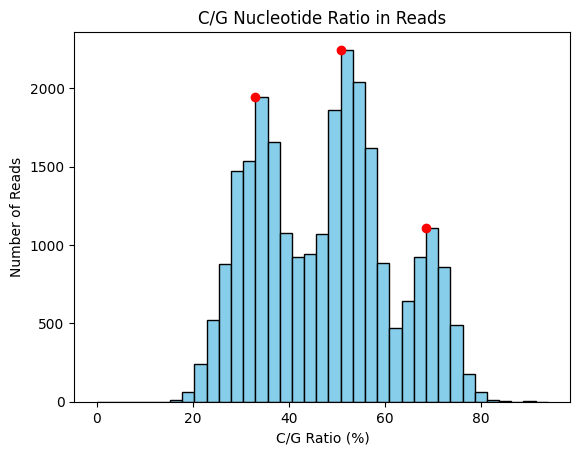

Total Reads: 25749
Average C/G Ratio: 47.85%
Number of Peaks: 3


In [34]:
fasta_file = "reads_for_analysis.fastq"
print_cg_ratio_hist(fasta_file)

## find records for each peak

In [40]:
# debug = True
debug = False

fasta_file = "reads_for_analysis.fastq"

sequences = read_sequences(fasta_file, debug)

peak_percents = analyze_cg_ratio_in_fastq(sequences)

top_5_records = find_sequences_for_blast(fasta_file, peak_percents)

Total Reads: 25749
Average C/G Ratio: 47.85%
Number of Peaks: 3
Number of records with C/G ratio 33.04%: 297
Number of records with C/G ratio 50.83%: 526
Number of records with C/G ratio 68.62%: 46


In [36]:
# Print the first 5 records for each ratio
for ratio, records in top_5_records.items():
    print(f"Records with C/G ratio {ratio:.2f}% (Top 5):")
    for record in records:
        # print(f"Header: {record.id}")
        print(f"Sequence: {record.seq}")

Records with C/G ratio 33.04% (Top 5):
Sequence: ATGAATTTATATGGATTTAAAGAGGCTTTACAAAATTCAACTTTACCTATGTTTGGTACATGCGCAGGATTAATAGTTCTAGCGCAAGATATAGTTGGTGAAGAAGGATACCTTAACAAGTTGAATATTACTGTACAACGAAACTCATTCG
Sequence: AGCAAATCTGAATAATAAACAAGTTTAGTATAAGGTGGTGAGATAGTGGCTTCTCTTAAAGAAATAGATACTCGAATAAAATCAACCAAAAAAATGAAGCAGATTACGAAAGCGATGAACATGGTATCAAGTTCAAAACTTCGTAGAGCTG
Sequence: GTGTGTTAGTACTTTCAGTCATATTGTTGTTTTCAATACCAACACCTGTTGCAGTAATTTTAATGGGCATTGCAGCATTGTTTACTGAAGCATTGGTGGGAGCAAATTATGCGATTGCAGTAGTTTTTATTACAATACAAGTTATTTTAAT
Sequence: TTATAACGAATTAATCCGTAAGCAAAATCAAGAATTAGATGAGAAGCAACCAGAATTACCTTATATCGTTGTCATTGTAGATGAGCTTGCAGATTTAATGATGGTAGCTGGTAAAGAAGTTGAAAATGCGATTCAACGTATTACACAAATG
Sequence: TGATAGTGAGAATCATTATCAATTAGGTAACACACAATATTATAGAATTTTAAATTTGAGGAGGAAGCGCTTTTGATTGAAAAAAGTCAAGCATGTCACGATTCATTGTTAGATTCTGTAGGGCAAACACCTATGGTTCAACTTCATCAAC
Records with C/G ratio 50.83% (Top 5):
Sequence: ATACATATAGTGAAAATAGAGGCGGAAATAGTTTTTCCGTACGGCGCTAAACAGCTCGCGTACCGTAGGCGGCGTCGCGCGCGTGGCATCGTCTTCACCATA

## blast search

In [73]:
result_table = blast_search(top_5_records)
print(result_table)

Records with C/G ratio 33.04% (Top 5):
Searching: M00827:12:000000000-AEUNW:1:1101:21543:2685
Searching: M00827:12:000000000-AEUNW:1:1101:15528:4371
Searching: M00827:12:000000000-AEUNW:1:1101:8783:6057
Searching: M00827:12:000000000-AEUNW:1:1101:13322:9270
Searching: M00827:12:000000000-AEUNW:1:1101:11215:10798
Records with C/G ratio 50.83% (Top 5):
Searching: M00827:12:000000000-AEUNW:1:1101:18967:1954
Searching: M00827:12:000000000-AEUNW:1:1101:22570:7694
Searching: M00827:12:000000000-AEUNW:1:1101:15883:9393
Searching: M00827:12:000000000-AEUNW:1:1101:8531:13712
Searching: M00827:12:000000000-AEUNW:1:1101:22037:14458
Records with C/G ratio 68.62% (Top 5):
Searching: M00827:12:000000000-AEUNW:1:1101:9274:5136
Searching: M00827:12:000000000-AEUNW:1:1101:4398:12181
Searching: M00827:12:000000000-AEUNW:1:1101:26991:22721
Searching: M00827:12:000000000-AEUNW:1:1101:14586:26916
Searching: M00827:12:000000000-AEUNW:1:1102:24426:23876
                                         Read ID      O

In [74]:
print(result_table)

                                         Read ID      Organism
0    M00827:12:000000000-AEUNW:1:1101:21543:2685        aureus
1    M00827:12:000000000-AEUNW:1:1101:15528:4371        aureus
2     M00827:12:000000000-AEUNW:1:1101:8783:6057        aureus
3    M00827:12:000000000-AEUNW:1:1101:13322:9270        aureus
4   M00827:12:000000000-AEUNW:1:1101:11215:10798        aureus
5    M00827:12:000000000-AEUNW:1:1101:18967:1954          coli
6    M00827:12:000000000-AEUNW:1:1101:22570:7694          coli
7    M00827:12:000000000-AEUNW:1:1101:15883:9393          coli
8    M00827:12:000000000-AEUNW:1:1101:8531:13712          coli
9   M00827:12:000000000-AEUNW:1:1101:22037:14458          coli
10    M00827:12:000000000-AEUNW:1:1101:9274:5136  thermophilus
11   M00827:12:000000000-AEUNW:1:1101:4398:12181  thermophilus
12  M00827:12:000000000-AEUNW:1:1101:26991:22721  thermophilus
13  M00827:12:000000000-AEUNW:1:1101:14586:26916  thermophilus
14  M00827:12:000000000-AEUNW:1:1102:24426:23876  therm